# Unit 12 - Tales from the Crypto

---


In [4]:
!pip install newsapi-python

## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [5]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arjan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Read your api key environment variable
news_api_key = os.getenv('news_api_key')

In [7]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [8]:
# Fetch the Bitcoin news articles
btc_news=newsapi.get_everything(q='bitcoin', language='en')

In [9]:
# Fetch the Ethereum news articles
eth_news=newsapi.get_everything(q='ethereum', language='en')

In [10]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


In [11]:
btc_df = pd.DataFrame(btc_sentiments)
btc_df

,text,date,compound,positive,negative,neutral
0,A similar hoax earlier this year tied Walmart ...,2021-11-05,-0.2732,0.000,0.063,0.937
1,Theres a big new presence slurping up power fr...,2021-10-28,0.3612,0.096,0.000,0.904
2,"For all the talk of democratizing finance, the...",2021-10-26,0.0000,0.000,0.000,1.000
3,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
4,Representation of cryptocurrency Bitcoin is pl...,2021-10-21,0.0000,0.000,0.000,1.000
5,Posted \r\nBitcoin climbed to a record high on...,2021-10-20,0.4588,0.103,0.000,0.897
6,Bitcoin artwork displayed at the Bitcoin 2021 ...,2021-11-02,0.5719,0.148,0.000,0.852
7,Ether.\r\nNurPhoto\r\n<ul><li>The approval of ...,2021-11-06,0.4767,0.110,0.000,0.890
8,Bitcoin was trading over 7% higher on Monday m...,2021-11-08,0.0000,0.000,0.000,1.000
9,Australian Baseball League club Perth Heat wil...,2021-11-17,-0.1027,0.000,0.043,0.957


In [12]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [13]:
eth_df = pd.DataFrame(eth_sentiments)
eth_df

,text,date,compound,positive,negative,neutral
0,"If you claim ownership, someone will probably ...",2021-11-19,0.7783,0.216,0.000,0.784
1,"In keeping with a previous announcement, AMC t...",2021-11-12,0.5719,0.153,0.000,0.847
2,Ethereum and bitcoin are the two biggest crypt...,2021-11-05,0.4588,0.094,0.000,0.906
3,Elon Musk\r\npicture alliance / Getty Images\r...,2021-11-01,0.5267,0.093,0.000,0.907
4,Cryptocurrency and business continuity line im...,2021-11-01,0.4588,0.097,0.000,0.903
5,Apple CEO Tim Cook said he owns cryptocurrency...,2021-11-09,0.4019,0.076,0.000,0.924
6,"With crypto rewards cards, a small percentage ...",2021-11-10,0.8176,0.221,0.000,0.779
7,Bitcoin and Ethereum.\r\nNurPhoto / Getty Imag...,2021-10-22,0.8225,0.208,0.000,0.792
8,"Representations of cryptocurrencies Bitcoin, E...",2021-11-01,0.0000,0.000,0.000,1.000
9,Bitcoin has lost almost 20 per cent in less th...,2021-11-19,-0.3182,0.000,0.062,0.938


In [14]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.153950,0.049450,0.015550,0.934950
std,0.328104,0.058719,0.039944,0.062303
min,-0.680800,0.000000,0.000000,0.833000
25%,0.000000,0.000000,0.000000,0.889250
50%,0.000000,0.000000,0.000000,0.931000
75%,0.416125,0.104750,0.000000,1.000000
max,0.571900,0.153000,0.167000,1.000000


In [15]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.307340,0.077450,0.006200,0.916300
std,0.340277,0.078558,0.019083,0.077373
min,-0.318200,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.862750
50%,0.381550,0.074000,0.000000,0.915500
75%,0.549700,0.111750,0.000000,1.000000
max,0.822500,0.221000,0.062000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had the highest mean positive score

Q: Which coin had the highest compound score?

A: Both coins had a compound score of 20

Q. Which coin had the highest positive score?

A: ETH had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import string
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arjan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\arjan\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arjan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arjan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')


In [18]:
#Pull eth articles into a list
import itertools
eth_articles = []
for i in eth_df['text']:
    eth_articles.append(i)



In [19]:
# Pull btc articles into a list
btc_articles = []
for i in btc_df['text']:
    btc_articles.append(i)

In [20]:
# Create a string from the list for bitcoin and eth
eth_str = ' '.join(map(str, eth_articles)) 
btc_str = ' '.join(map(str,btc_articles))


In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [22]:
# Create a new tokens column for Bitcoin
btc_processed = tokenizer(btc_str)
btc_processed

['similar',
 'hoax',
 'earlier',
 'year',
 'tied',
 'walmart',
 'litecoinif',
 'buy',
 'something',
 'verge',
 'link',
 'vox',
 'media',
 'may',
 'earn',
 'commission',
 'see',
 'ethic',
 'statementphoto',
 'illustration',
 'thiago',
 'prudencios',
 'char',
 'theres',
 'big',
 'new',
 'presence',
 'slurping',
 'power',
 'us',
 'grid',
 'growing',
 'bitcoin',
 'miner',
 'new',
 'research',
 'show',
 'us',
 'ha',
 'overtaken',
 'china',
 'top',
 'global',
 'destination',
 'bitcoin',
 'mining',
 'char',
 'talk',
 'democratizing',
 'finance',
 'vast',
 'majority',
 'bitcoin',
 'continues',
 'owned',
 'relative',
 'handful',
 'investorsas',
 'flagged',
 'bloomberg',
 'newly',
 'released',
 'data',
 'national',
 'bureau',
 'char',
 'keeping',
 'previous',
 'announcement',
 'amc',
 'theater',
 'accept',
 'cryptocurrencies',
 'payment',
 'online',
 'purchasesbitcoin',
 'ethereum',
 'bitcoin',
 'cash',
 'litecoin',
 'acceptedpreviously',
 'compa',
 'char',
 'representation',
 'cryptocurrency',


In [23]:
# Create a new tokens column for Ethereum
eth_processed = tokenizer(eth_str)
eth_processed

['claim',
 'ownership',
 'someone',
 'probably',
 'want',
 'take',
 'itin',
 'may',
 'one',
 'better',
 'piece',
 'performance',
 'art',
 'year',
 'australian',
 'geoffrey',
 'huntley',
 'ha',
 'created',
 'website',
 'promise',
 'char',
 'keeping',
 'previous',
 'announcement',
 'amc',
 'theater',
 'accept',
 'cryptocurrencies',
 'payment',
 'online',
 'purchasesbitcoin',
 'ethereum',
 'bitcoin',
 'cash',
 'litecoin',
 'acceptedpreviously',
 'compa',
 'char',
 'ethereum',
 'bitcoin',
 'two',
 'biggest',
 'cryptocurrenciesjordan',
 'mansfield',
 'getty',
 'imagescrypto',
 'investor',
 'holding',
 'ethereum',
 'rather',
 'bitcoin',
 'interest',
 'rate',
 'rise',
 'jpmorgan',
 'said',
 'beca',
 'char',
 'elon',
 'muskpicture',
 'alliance',
 'getty',
 'imagesa',
 'cryptocurrency',
 'named',
 'elon',
 'musk',
 'ha',
 'shot',
 'moon',
 'gain',
 'october',
 'dogelon',
 'mars',
 'traded',
 'november',
 'char',
 'cryptocurrency',
 'business',
 'continuity',
 'line',
 'image',
 'business',
 'co

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [25]:
# Generate the Bitcoin N-grams where N=2
btc_counts = Counter(ngrams(btc_processed, n=2))
print(dict(btc_counts))

{('similar', 'hoax'): 1, ('hoax', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'tied'): 1, ('tied', 'walmart'): 1, ('walmart', 'litecoinif'): 1, ('litecoinif', 'buy'): 1, ('buy', 'something'): 1, ('something', 'verge'): 1, ('verge', 'link'): 1, ('link', 'vox'): 1, ('vox', 'media'): 1, ('media', 'may'): 1, ('may', 'earn'): 1, ('earn', 'commission'): 1, ('commission', 'see'): 1, ('see', 'ethic'): 1, ('ethic', 'statementphoto'): 1, ('statementphoto', 'illustration'): 1, ('illustration', 'thiago'): 1, ('thiago', 'prudencios'): 1, ('prudencios', 'char'): 1, ('char', 'theres'): 1, ('theres', 'big'): 1, ('big', 'new'): 1, ('new', 'presence'): 1, ('presence', 'slurping'): 1, ('slurping', 'power'): 1, ('power', 'us'): 1, ('us', 'grid'): 1, ('grid', 'growing'): 1, ('growing', 'bitcoin'): 1, ('bitcoin', 'miner'): 1, ('miner', 'new'): 1, ('new', 'research'): 1, ('research', 'show'): 1, ('show', 'us'): 1, ('us', 'ha'): 1, ('ha', 'overtaken'): 1, ('overtaken', 'china'): 1, ('china', 'top'): 1, ('

In [26]:
# Generate the Ethereum N-grams where N=2
eth_counts = Counter(ngrams(eth_processed, n=2))
print(dict(eth_counts))

{('claim', 'ownership'): 1, ('ownership', 'someone'): 1, ('someone', 'probably'): 1, ('probably', 'want'): 1, ('want', 'take'): 1, ('take', 'itin'): 1, ('itin', 'may'): 1, ('may', 'one'): 1, ('one', 'better'): 1, ('better', 'piece'): 1, ('piece', 'performance'): 1, ('performance', 'art'): 1, ('art', 'year'): 1, ('year', 'australian'): 1, ('australian', 'geoffrey'): 1, ('geoffrey', 'huntley'): 1, ('huntley', 'ha'): 1, ('ha', 'created'): 1, ('created', 'website'): 1, ('website', 'promise'): 1, ('promise', 'char'): 1, ('char', 'keeping'): 1, ('keeping', 'previous'): 1, ('previous', 'announcement'): 1, ('announcement', 'amc'): 1, ('amc', 'theater'): 1, ('theater', 'accept'): 1, ('accept', 'cryptocurrencies'): 1, ('cryptocurrencies', 'payment'): 1, ('payment', 'online'): 1, ('online', 'purchasesbitcoin'): 1, ('purchasesbitcoin', 'ethereum'): 1, ('ethereum', 'bitcoin'): 2, ('bitcoin', 'cash'): 1, ('cash', 'litecoin'): 1, ('litecoin', 'acceptedpreviously'): 1, ('acceptedpreviously', 'compa'):

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_processed)

[('bitcoin', 21),
 ('char', 18),
 ('us', 6),
 ('cryptocurrency', 6),
 ('new', 5),
 ('reuters', 5),
 ('exchange', 5),
 ('trading', 5),
 ('commission', 4),
 ('illustration', 4)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_processed)

[('char', 20),
 ('bitcoin', 10),
 ('ethereum', 8),
 ('cryptocurrency', 8),
 ('ha', 5),
 ('getty', 4),
 ('york', 4),
 ('ether', 4),
 ('said', 3),
 ('business', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

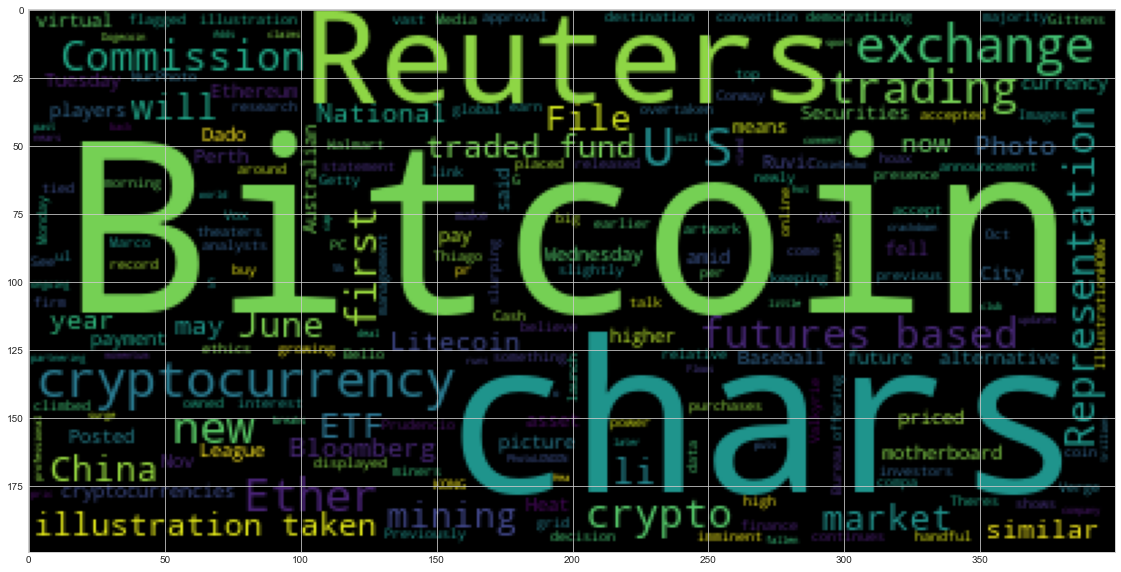

In [31]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_str)
plt.imshow(btc_wc)

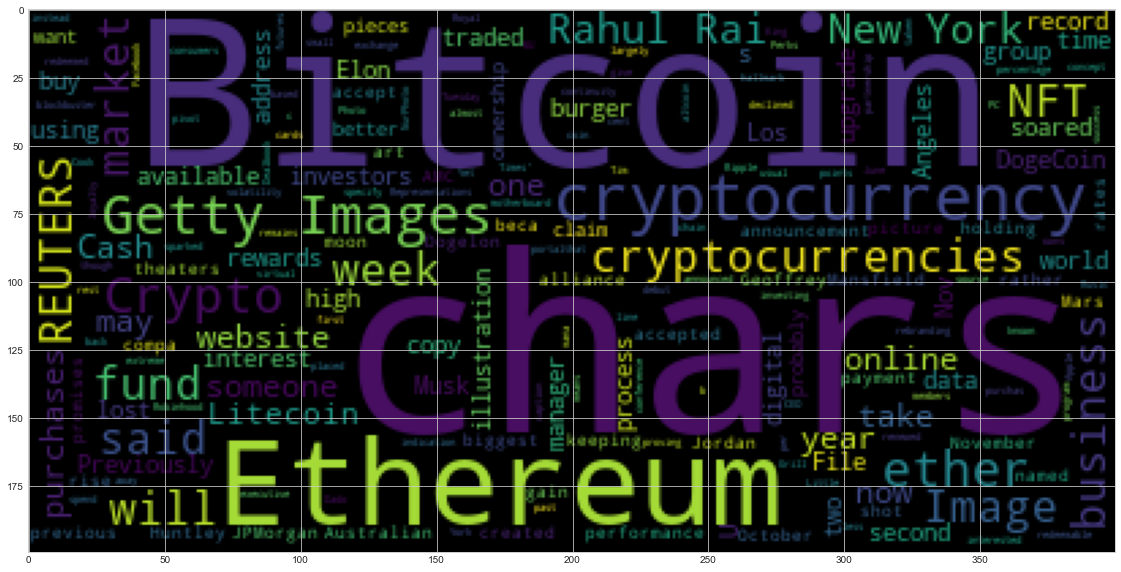

In [32]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
!pip install -U pip setuptools wheel
!pip install -U spacy

  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\arjan\\AppData\\Local\\Temp\\pip-uninstall-993aqgu1\\wheel.exe'
Consider using the `--user` option or check the permissions.



In [35]:
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Run the NER processor on all of the text
doc = nlp(btc_str)


In [39]:
# Render the visualization
displacy.render(doc, style='ent')

In [40]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['earlier this year', 'Verge', 'Vox Media', 'Photo Illustration', 'Thiago Prudencio/S', 'U.S.', 'U.S.', 'China', 'Bloomberg', 'the National Bureau', 'AMC', 'Bitcoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/', 'IllustrationHONG KONG', 'Oct 21', 'Reuters', 'Wednesday', 'first', 'U.S.', 'Conway G. Gittens', 'Bitcoin 2021', 'Marco Bello/', 'The Securities and Exchange Commission', 'Valkyrie', 'NurPhoto', 'ETF', 'first', 'ETF', '7%', 'Monday', 'morning', 'around $66,105', '3%', '4,722', 'over 9%', 'Australian Baseball League', 'Perth Heat', 'first', 'Hea', '68,000', 'Ether', '5k', 'CoinGecko', 'more than $3 trillion', 'May 20, 2021', 'REUTERS', 'Dado Ruvic/File PhotoLONDON', 'Reuters', '60', 'Tuesday', 'Chinas National Development and Reform Commission', 'Meng Wei', 'A decade ago', 'just a few years old', 'New York City', 'Eric Adams', 'Reuters', 'Reuters', 'one', 'Australian Baseball League', 'Wednesday', 'Yuichiro', 'Chino', 'VanEck', 'ETF', 'Tuesday', 'the Chicago Board Options Exchange

---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
# done above

In [42]:
# Run the NER processor on all of the text
doc = nlp(eth_str)


In [43]:
# Render the visualization
displacy.render(doc, style='ent')

In [44]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_])

['this year', 'Australian Geoffrey Huntley', 'AMC', 'two', 'Jordan Mansfield', 'JPMorgan', 'beca', 'Elon Musk', 'Getty Images', 'Elon Musk', '3,780%', 'October', 'Dogelon Mars', '0.00000229', 'November 1', '0.0', 'Getty Images', 'the past week', 'Facebook', 'Apple', 'Tim Cook', "The New York Times'", 'Tuesday', '1-2%', 'Ethereum', 'NurPhoto', 'Getty Images', 'first', 'Bitcoin, Ethereum', 'DogeCoin', 'June 29, 2021', 'REUTERS', 'Dado Ruvic/Illustration/File Photo MU', 'less than two weeks', 'Burger King', 'Robinhood', 'Royal Perks', '5', 'Getty Images', 'Ethereum', 'US', 'Rahul Rai', 'Market Neutral', 'BlockTower Capital', 'Rahul Rai', 'Crypto', 'Rahul Rai', '20', 'NFT', '] Ether', 'second', 'a record above $', '4,400', 'Friday', 'Ethereum', 'Bitcoin’s', 'second', 'NEW YORK', 'Reuters', 'a record $6.4 billion', 'this year', 'CoinShares', 'American Airlines', 'Airbus', 'A321-200', 'Los Angeles International', 'Los Angeles', 'California', 'U.S.', 'March 28, 2018', 'REUTERS', 'Mike Blake/F

---